---
title: "MLE and linear regression"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

The equation for linear regression is given by:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_k x_k + \epsilon,
$$
where $\beta_0$ is the intercept, $\beta_1, \beta_2, \ldots, \beta_k$ are the coefficients for the predictor variables $x_1, x_2, \ldots, x_k$, and $\epsilon$ is the error term.

Reminder: the regression is called linear because it is linear in the parameters $\beta_i$, not necessarily in the predictor variables $x_i$. For example, a model like $y = \beta_0 + \beta_1 x + \beta_2 x^2 + \epsilon$ is still considered linear regression because it is linear in $\beta_0, \beta_1,$ and $\beta_2$. If you are still not convinced, consider that you can always create new predictor variables that are transformations of the original ones (e.g., $x_2 = x^2$) and include them in a linear regression model.

The $\epsilon$ term is typically assumed to be normally distributed with mean 0 and constant variance $\sigma^2$. **This assumption is key!** It allows us to use maximum likelihood estimation to estimate the parameters $\beta_0, \beta_1, \ldots, \beta_k$. Let's see how.

First, we solve the equation above for $\epsilon$:

$$
\epsilon = y - (\beta_0 + \beta_1 x_1 + \ldots + \beta_k x_k).
$$

See the figure below for a practical example.

* **left panel:** scatter plot of data points (blue dots) and the underlying model (parabola) used as the basis (red line).
* **middle panel:** scatter plot for epsilon, which is, of course, just the vertical distance from each data point to the red line in the left panel. This distance is the error term, also called the residual.
* **right panel:** the probability density function from which the epsilon values were drawn (normal distribution with mean 0 and standard deviation 5).

In [3]:
#| code-summary: "import libraries"
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, uniform, norm

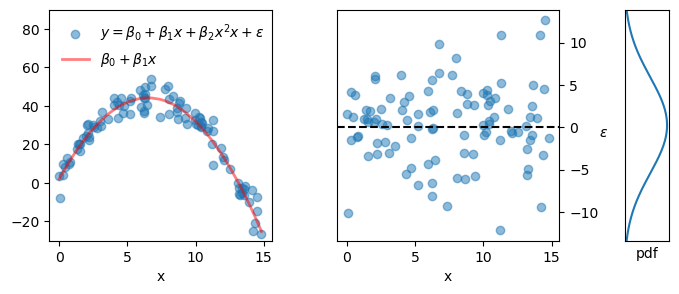

In [4]:
fig, ax = plt.subplots(1,3, figsize=(8,3), gridspec_kw=dict(width_ratios=[1,1, 0.2]))
fig.subplots_adjust(wspace=0.4)
beta0 = 2
beta1 = 13
beta2 = -1

np.random.seed(seed=1)
x = uniform.rvs(size=100) * 15
x = np.sort(x)
epsilon = norm.rvs(size=100, scale=5)
y = beta0 + beta1 * x + beta2 * x**2 + epsilon

ax[0].scatter(x, y, alpha=0.5, label=r"$y=\beta_0 + \beta_1 x + \beta_2 x^2x + \epsilon$")
ax[0].plot(x, beta0 + beta1 * x + beta2 * x**2, color='red', lw=2, label=r"$\beta_0 + \beta_1 x$", alpha=0.5)
ax[0].set(xlabel="x",
          ylim=(-30, 90),
          )
ax[0].legend(frameon=False, loc='upper left')

ax[1].scatter(x, epsilon, alpha=0.5)
ax[1].axhline(0, color='black', ls='--')
ax[1].set(xlabel="x")
ax[1].set_ylabel(r"$\epsilon$", rotation=0)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()

eps_vec = np.linspace(-12, 12, 1000)
ax[2].plot(norm.pdf(eps_vec, loc=0, scale=5), eps_vec)
ax[2].set(ylim=(-12, 12),
          xlabel='pdf',
          xticks=[],
          yticks=[]
          );

We can now "forget" about the $y$ and $x$ variables for a moment, and model the error term $\epsilon$ directly. Since we assumed that $\epsilon$ is normally distributed with mean 0 and variance $\sigma^2$, we can write the following joint probability density function for $\epsilon$:

$$
f(\epsilon \mid \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{\epsilon^2}{2\sigma^2}\right).
$$

Using this expression for the joint pdf in the log likelihood function yields:
$$
\ell(\sigma^2 \mid \epsilon_{1:n}) = \sum_{i=1}^{n} \log f(\epsilon_i \mid \sigma^2).
$$

This is the time to go back to the original variables. Substituting the expression for $\epsilon$ into the log likelihood function gives:

\begin{align*}
\ell(\beta_0, \beta_1, \ldots, \beta_k, \sigma^2 \mid y_{1:n}, x_{1:n}) &= \sum_{i=1}^{n} \log f\left(y_i - (\beta_0 + \beta_1 x_{i1} + \ldots + \beta_k x_{ik}) \mid \sigma^2\right)\\
&= \sum_{i=1}^{n} \log \left( \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{(y_i - (\beta_0 + \beta_1 x_{i1} + \ldots + \beta_k x_{ik}))^2}{2\sigma^2}\right) \right)\\
&= \sum_{i=1}^{n} \left( -\frac{1}{2} \log(2\pi \sigma^2) - \frac{(y_i - (\beta_0 + \beta_1 x_{i1} + \ldots + \beta_k x_{ik}))^2}{2\sigma^2} \right)\\
&= -\frac{n}{2} \log(2\pi \sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_{i1} + \ldots + \beta_k x_{ik}))^2.
\end{align*}

In the expression above, instead of solving for the specific case of two predictor variables (as shown in the graph), I solved for the general case of $k$ predictor variables, and therefore we would like to find the best values for the $k+1$ coefficients $\beta_0, \beta_1, \ldots, \beta_k$.
Notice that the first term in the log likelihood does not depend on the $\beta$ parameters, so we can ignore it for the purpose of maximization. 

Now, here's the kicker: because of the negative sign in front of the second term, maximizing the log likelihood is equivalent to minimizing the sum of squared errors (SSE):

$$
\text{SSE} = \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_{i1} + \ldots + \beta_k x_{ik}))^2.
$$

Mind blown.

The general case that the best set of parameters $\hat{\theta}$ are those that maximize the log likelihood,
$$
\hat{\theta} = \arg\max_{\theta_i} \ell(\theta_i \mid x_{1:n}),
$$
translates in the specific case of linear regression to "the best set of parameters $\hat{\beta}$ are those that minimize the sum of squared errors": 
$$
\hat{\beta} = \arg\min_{\beta_i} \text{SSE}.
$$

Final thought: whenever we use the Least Squares method to fit a linear regression model, we are assuming (implicitly or explicitly) that the error terms are normally distributed.